In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import lightgbm as lgb
import xgboost as xgb
from keras.layers import LSTM, Dropout, Dense, Conv1D, Flatten

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from pypfopt import EfficientFrontier, risk_models, expected_returns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
sp500_companies = pd.read_csv('sp500_companies.csv')
sp500_index = pd.read_csv('sp500_index.csv')
sp500_stocks = pd.read_csv('sp500_stocks.csv')

sp500_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,242.84,3670720643072,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064600
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,142.44,3488355713024,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.061391
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,443.57,3297889746944,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058039
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,227.03,2387220627456,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042012
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,176.49,2148483465216,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.037811


In [9]:
sp500_index.head()

,S&P500
Date,
2014-12-08,2060.31
2014-12-09,2059.82
2014-12-10,2026.14
2014-12-11,2035.33
2014-12-12,2002.33


In [10]:
sp500_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,0.0,0.0,0.0,0.0,0.0,0.0
819244,2010-01-04,GILD,0.0,0.0,0.0,0.0,0.0,0.0
131530,2010-01-04,ADI,0.0,0.0,0.0,0.0,0.0,0.0
1758744,2010-01-04,VTR,0.0,0.0,0.0,0.0,0.0,0.0
1071030,2010-01-04,LW,0.0,0.0,0.0,0.0,0.0,0.0


**Data Preprocessing**

In [3]:
sp500_index['Date'] = pd.to_datetime(sp500_index['Date'])
sp500_stocks['Date'] = pd.to_datetime(sp500_stocks['Date'])

sp500_index = sp500_index.sort_values('Date')
sp500_stocks = sp500_stocks.sort_values('Date')
sp500_companies.fillna(0, inplace=True)
sp500_stocks.fillna(0, inplace=True)

sp500_index.set_index('Date', inplace=True)

**Exploratory Data Analysis (EDA)**

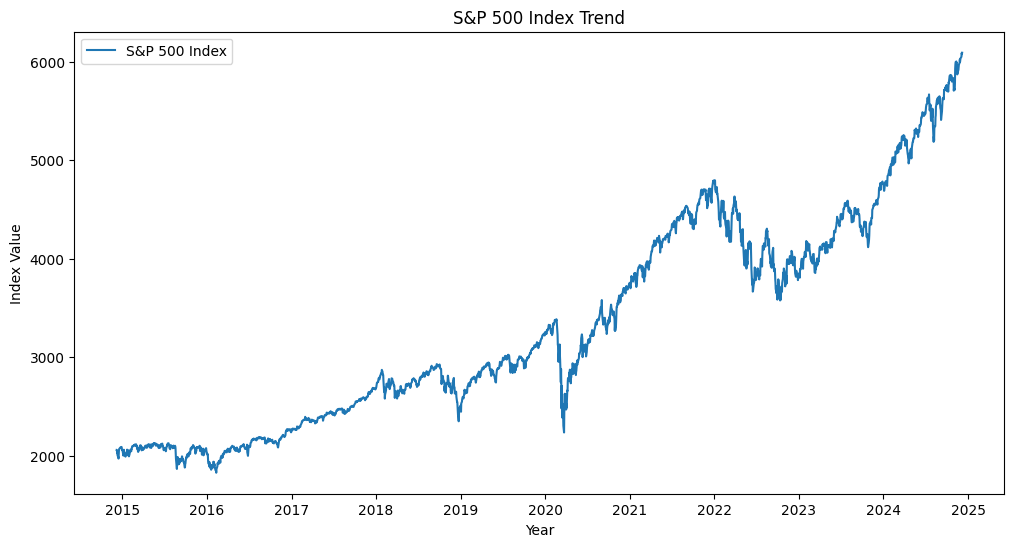

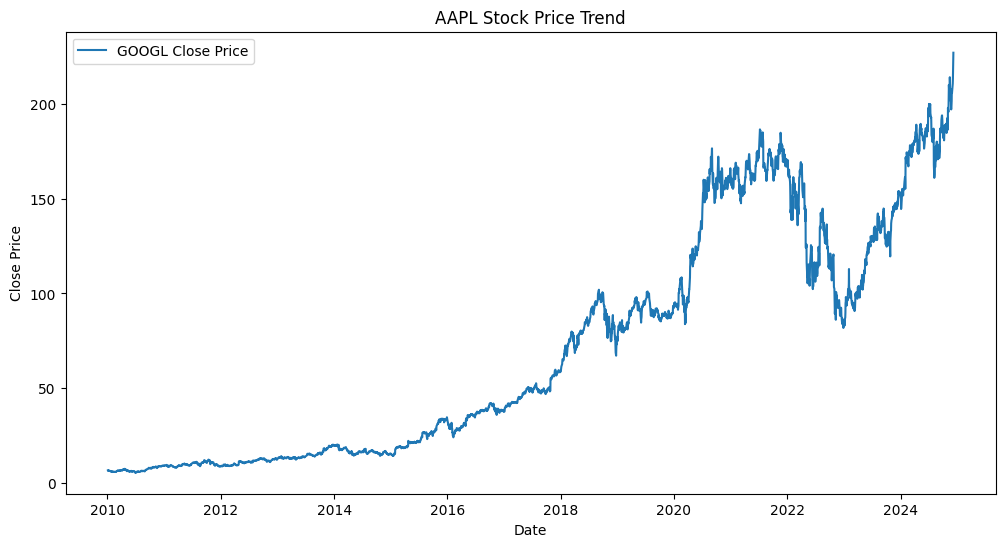

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_index.index, sp500_index['S&P500'], label="S&P 500 Index")
plt.title("S&P 500 Index Trend")
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.show()

aapl_stock = sp500_stocks[sp500_stocks['Symbol'] == 'AMZN']
plt.figure(figsize=(12, 6))
plt.plot(aapl_stock['Date'], aapl_stock['Close'], label='GOOGL Close Price')
plt.title('AAPL Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

> 2. LSTM Model for Stock Price Prediction

Epoch 1/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0113 - val_loss: 0.0012
Epoch 2/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 2.4145e-04 - val_loss: 0.0016
Epoch 3/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 2.3837e-04 - val_loss: 0.0011
Epoch 4/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 3.4357e-04 - val_loss: 8.3795e-04
Epoch 5/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.5734e-04 - val_loss: 6.1938e-04
Epoch 6/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 2.2404e-04 - val_loss: 5.3064e-04
Epoch 7/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.4528e-04 - val_loss: 4.6718e-04
Epoch 8/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.5164e-04 - val_loss: 0.0019
Epoch 9/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.8757e-04 - val_loss: 6.4270e-04
Epoch 10/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.7531e-04 - val_loss: 4.8779e-04
Epoch 11/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.1096

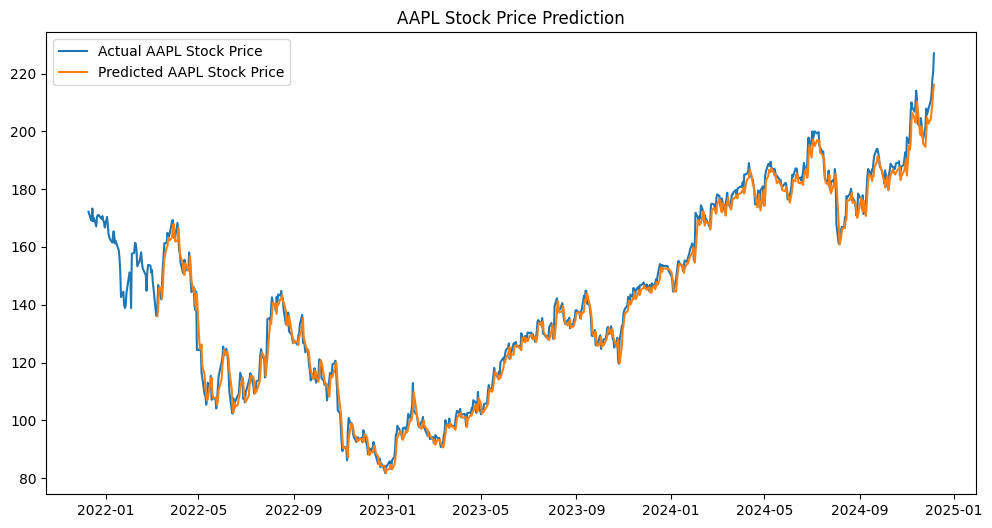

In [9]:
aapl_stock.set_index('Date', inplace=True)
aapl_prices = aapl_stock['Close'].values.reshape(-1,1)

scaler = MinMaxScaler()
aapl_prices_scaled = scaler.fit_transform(aapl_prices)

train_size = int(len(aapl_prices_scaled) * 0.8)
train_data = aapl_prices_scaled[:train_size]
test_data = aapl_prices_scaled[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data)-seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# model = Sequential()
# model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=100, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(12,6))
plt.plot(aapl_stock.index[train_size:], aapl_stock['Close'][train_size:], label='Actual AAPL Stock Price')
plt.plot(aapl_stock.index[train_size+seq_length:], predictions, label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()

In [7]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse}, MAE: {mae}, R2: {r2}")

evaluate_model(y_test, predictions)

RMSE: 173.1772833137725, MAE: 171.27814863339074, R2: -2123659.2034093332


[*********************100%***********************]  1 of 1 completed

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


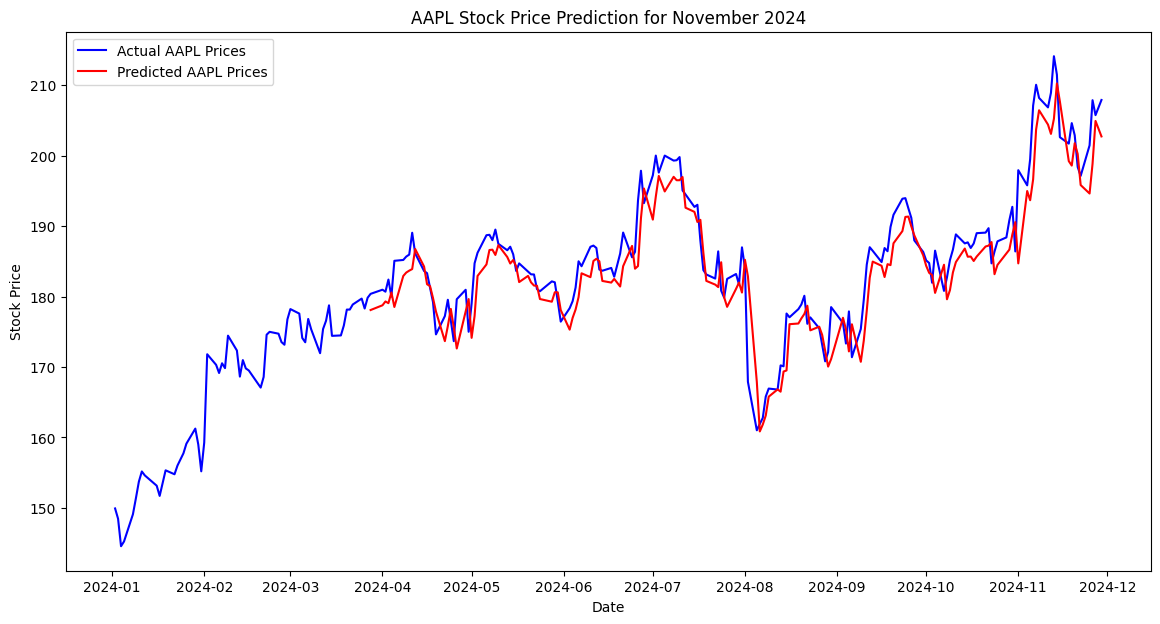

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Fetch data from Yahoo Finance
aapl = yf.download("AMZN", start="2024-01-01", end="2024-11-30")
aapl['Date'] = aapl.index
aapl_prices = aapl['Close'].values.reshape(-1, 1)

# Scale the data using the same scaler
# scaler = MinMaxScaler()
aapl_prices_scaled = scaler.transform(aapl_prices)

# Create sequences for prediction
seq_length = 60
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

X_future = create_sequences(aapl_prices_scaled, seq_length)

# Predict November 2024 stock prices
predictions = model.predict(X_future)
predictions_rescaled = scaler.inverse_transform(predictions)

# Plot real vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(aapl['Date'], aapl['Close'], label="Actual AAPL Prices", color='blue')
plt.plot(aapl['Date'][seq_length:], predictions_rescaled, label="Predicted AAPL Prices", color='red')
plt.title("AAPL Stock Price Prediction for November 2024")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


**Portfolio Optimization**

In [9]:
# stock_prices = sp500_stocks.pivot(index='Date', columns='Symbol', values='Close').dropna()

# mean_returns = expected_returns.mean_historical_return(stock_prices)
# cov_matrix = risk_models.sample_cov(stock_prices)

# ef = EfficientFrontier(mean_returns, cov_matrix)
# weights = ef.max_sharpe()
# cleaned_weights = ef.clean_weights()

# print(cleaned_weights)
# ef.portfolio_performance(verbose=True)

**Visualization**

In [10]:
import nbformat
print(nbformat.__version__)

5.10.4


In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp500_index.index, y=sp500_index['S&P500'], mode='lines', name='S&P 500'))
fig.update_layout(title='S&P 500 Index Over Time', xaxis_title='Date', yaxis_title='Index Value')
fig.show()

aapl_candlestick = aapl_stock[['Open', 'High', 'Low', 'Close']].copy()
aapl_candlestick['Date'] = aapl_stock.index

fig = go.Figure(data=[go.Candlestick(x=aapl_candlestick['Date'],
                                      open=aapl_candlestick['Open'],
                                      high=aapl_candlestick['High'],
                                      low=aapl_candlestick['Low'],
                                      close=aapl_candlestick['Close'])])

fig.update_layout(title='AAPL Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()
